# Advanced House Prices - Regression Techniques Part 1

# - Using Seaborn predominantly for Data Visualization

# - Using Regularized Regression Models, Decision Trees and RandomForest Regressor for Model training & predictions


## Aim

**The aim of this project is to predict the house prices based on the 79 explanatory variables / features (from the data provided) describing (almost) every aspect of residential homes in Ames, Iowa**

## Tasks

1. Get the data
2. Prepare the data
3. Explore the training data
4. Data Wrangling
5. Data Preprocessing
6. Tune your regression models using grid search
7. Check the correlation of the prediction of the  models on the test data
8. Choose the model with the lowest Root Mean Square Error
9. Make predictions for the test data

## File descriptions

[Data Description](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) is hosted on Kaggle Datasets. 

- **train.csv** - the training set
- **test.csv** the test set
- **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

# Task 1: Get the data

1. Go to the [Kaggle Datasets](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) page, and click the **Download** button.
2. Unzip **`house-prices-advanced-regression-techniques.zip`**, and then move **`house-prices-advanced-regression-techniques`** to a directory where you can easily access it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

## Task 1 : Data Preparation

In [2]:
#load in the dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#let gets the númber of samples and the columns in each dataset
print(df_train.shape)
print('\n', df_test.shape)

(1460, 81)

 (1459, 80)


In [4]:
#lets get the information for each column

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#lets get the information for each columns

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

## Task 2: Exploratory Data Analysis

In [6]:
#lets randomly get the 5 samples of the train dataset
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
315,316,60,RL,71.0,7795,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,188500
1223,1224,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,137900
873,874,40,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,0,9,2009,WD,Normal,133000
713,714,190,RL,60.0,9873,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,129000
590,591,60,RL,64.0,8320,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,185900


In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1010,2471,60,RM,60.0,9780,Pave,Grvl,Reg,Lvl,AllPub,...,216,0,NaN,NaN,NaN,0,4,2007,WD,Normal
1338,2799,70,RM,60.0,7518,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1047,2508,20,RL,66.0,10235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
155,1616,160,RM,21.0,1900,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
594,2055,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2008,WD,Normal


In [9]:
#lets generate descriptive statistics of the train dataset
#lets first, for the numeric columns

pd.set_option('max_columns', 105)

df_train.describe(exclude = [np.object])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#lets get the descriptive statistics for the object columns

df_train.describe(exclude = [np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


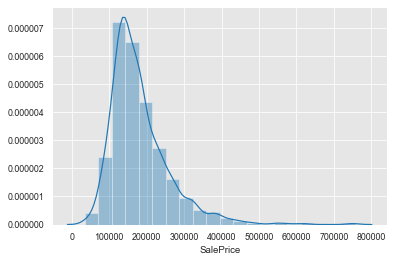

In [11]:
#lets explore the target variable: Saleprice

sns.set_context("paper")

sns.set_style("darkgrid", {"axes.facecolor": ".9"})


sns.distplot(df_train['SalePrice'], bins = 20)

In [12]:
#the train dataset is highly skewed 
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [13]:
#lets log transform the data

df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])



Skewness: 0.121335
Kurtosis: 0.809532


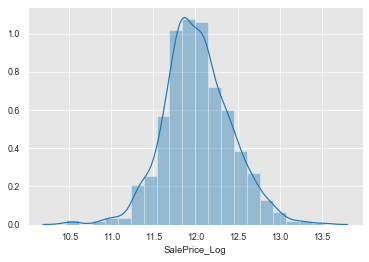

In [14]:
#now the data is normally distributed

sns.distplot(df_train['SalePrice_Log'], bins = 20)
print('\n')
print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

In [15]:
df_train = df_train.drop('SalePrice', axis = 1)

In [16]:
#lets get the numerical columns

print(df_train.dtypes[df_train.dtypes != 'object'].index, '\n')
print("Number of numeric columns: ", len(df_train.dtypes[df_train.dtypes != 'object'].index))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log'],
      dtype='object') 

Number of numeric columns:  38


In [17]:
#lets get the categorical columns

print(df_train.dtypes[df_train.dtypes == 'object'].index, '\n')
print("Number of categorical columns: ", len(df_train.dtypes[df_train.dtypes == 'object'].index))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object') 

Number of categorical columns:  43


In [18]:
#numeric columns

numeric = df_train.dtypes[df_train.dtypes != 'object'].index

df_train[numeric].sample(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
1239,1240,20,64.0,9037,8,5,2006,2006,32.0,428,0,1048,1476,1484,0,0,1484,0,0,2,0,2,1,6,1,2006.0,2,472,120,33,0,0,0,0,0,12,2007,12.490876
254,255,20,70.0,8400,5,6,1957,1957,0.0,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1957.0,1,294,250,0,0,0,0,0,0,6,2010,11.884489
1299,1300,20,75.0,7500,5,7,1959,1994,0.0,340,906,0,1246,1246,0,0,1246,1,0,1,1,3,1,6,0,1959.0,1,305,218,0,0,0,0,0,0,5,2010,11.944708
141,142,20,78.0,11645,7,5,2005,2005,0.0,1300,0,434,1734,1734,0,0,1734,1,0,2,0,3,1,7,0,2005.0,2,660,160,24,0,0,0,0,0,1,2006,12.468437
576,577,50,52.0,6292,7,7,1928,1950,0.0,0,0,861,861,877,600,0,1477,0,1,2,0,3,1,6,1,1928.0,1,216,0,50,0,0,0,0,0,8,2009,11.884489


In [19]:
#categorical columns

categorical = df_train.dtypes[df_train.dtypes == 'object'].index

df_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1097,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
624,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,TA,Min2,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
876,RL,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,Plywood,None,TA,TA,PConc,TA,TA,Gd,ALQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
305,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
381,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Gd,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New,Partial


In [20]:
#let get the missing values and their percentages in each columns

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [21]:
#a lot of the nan entries are not actually missing values let correct this
#these are columns with meaningful columns

cols_tofill = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_tofill:
    df_train[col].fillna('None', inplace = True)
    df_test[col].fillna('None', inplace = True)

In [22]:
def missdata(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    
    return missing_data.head(20)



In [23]:
missdata(df_train)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice_Log,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000


In [24]:
missdata(df_test)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFinSF2,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685
BsmtFinSF1,1,0.000685
GarageCars,1,0.000685


In [25]:
#lets fill the remaining with the mean of their specific columns

df_test.fillna(df_test.mean(), inplace = True)
df_train.fillna(df_train.mean(), inplace = True)

In [26]:
df_test.isnull().sum().sort_values(ascending = False).sum()

0

In [27]:
df_train.isnull().sum().sort_values(ascending = False).sum()

0

In [28]:
print(list(numeric))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log']


***Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data.***
***Like skewness, kurtosis is a statistical measure that is used to describe the distribution. Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail.***

In [29]:
#just like that the target variable, some feature values are not normally distributed
#we will use log values for those specific features

for col in numeric:
    print('{:15}'.format(col),
         'Skewness: {:06.5f}'.format(df_train[col].skew()), '  ',
          
         'Kurtosis: {:06.5f}'.format(df_train[col].kurt()))

Id              Skewness: 0.00000    Kurtosis: -1.20000
MSSubClass      Skewness: 1.40766    Kurtosis: 1.58019
LotFrontage     Skewness: 2.38495    Kurtosis: 21.84817
LotArea         Skewness: 12.20769    Kurtosis: 203.24327
OverallQual     Skewness: 0.21694    Kurtosis: 0.09629
OverallCond     Skewness: 0.69307    Kurtosis: 1.10641
YearBuilt       Skewness: -0.61346    Kurtosis: -0.43955
YearRemodAdd    Skewness: -0.50356    Kurtosis: -1.27225
MasVnrArea      Skewness: 2.67641    Kurtosis: 10.15432
BsmtFinSF1      Skewness: 1.68550    Kurtosis: 11.11824
BsmtFinSF2      Skewness: 4.25526    Kurtosis: 20.11334
BsmtUnfSF       Skewness: 0.92027    Kurtosis: 0.47499
TotalBsmtSF     Skewness: 1.52425    Kurtosis: 13.25048
1stFlrSF        Skewness: 1.37676    Kurtosis: 5.74584
2ndFlrSF        Skewness: 0.81303    Kurtosis: -0.55346
LowQualFinSF    Skewness: 9.01134    Kurtosis: 83.23482
GrLivArea       Skewness: 1.36656    Kurtosis: 4.89512
BsmtFullBath    Skewness: 0.59607    Kurtosis: -0.

In [30]:

for df in [df_train, df_test]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace = True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace = True, axis = 1)

In [31]:
print(df_train['LotArea_Log'].skew(), '\n',
      df_train['LotArea_Log'].kurt())

-0.1379938086958118 
 4.713358369108622


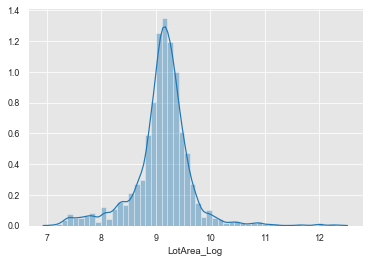

In [32]:
sns.distplot(df_train['LotArea_Log'])

In [33]:
numeric = df_train.dtypes[df_train.dtypes != 'object'].index

In [34]:
len(numeric)

38

In [35]:
df_train[numeric].head()

,Id,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log,GrLivArea_Log,LotArea_Log
0,1,60,65.0,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,7.444249,9.041922
1,2,20,80.0,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,7.140453,9.169518
2,3,60,68.0,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,7.487734,9.328123
3,4,70,60.0,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,7.448334,9.164296
4,5,60,84.0,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,7.695303,9.565214


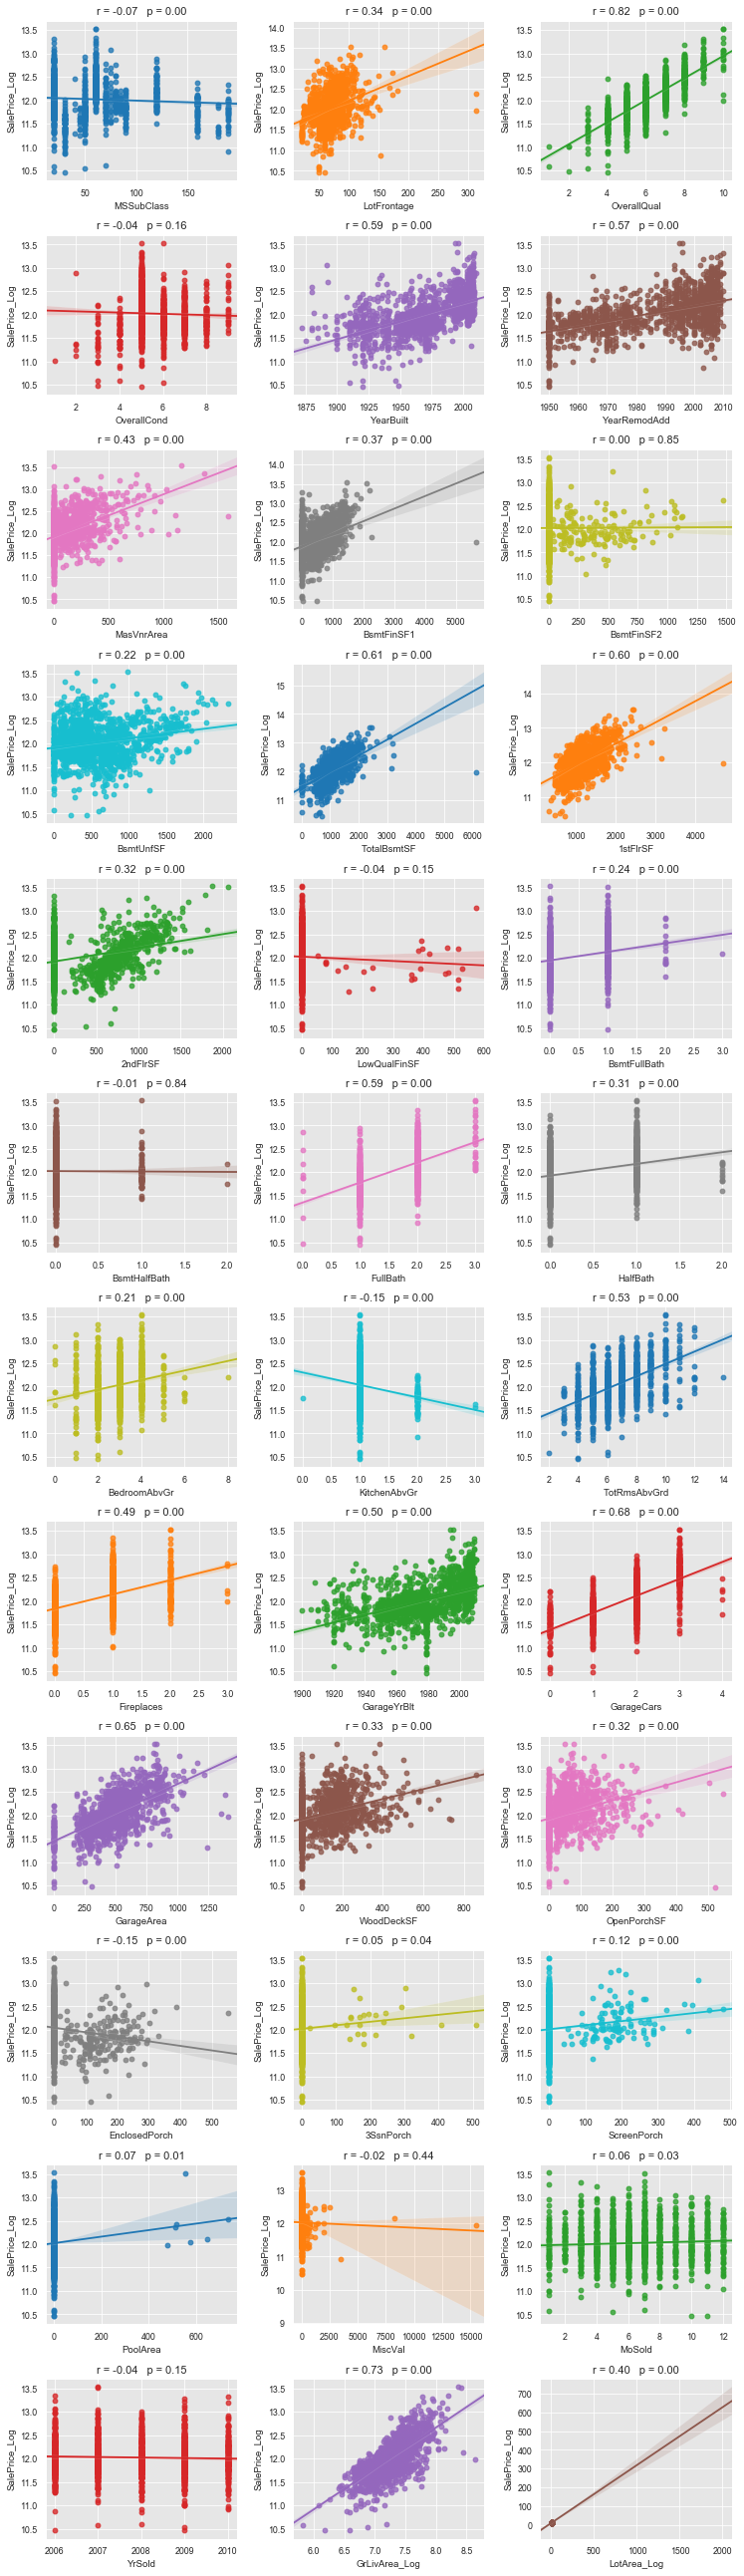

In [36]:
#regplot is used to visualiize relationships btw two features in the dataset
#plots relation of features to target feature:SalePrice_Log

nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(12, 3, figsize = (nr_cols*3.5, nr_rows*3))

num_feat = list(numeric)
not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
plot_feat = [c for c in list(numeric) if c not in not_plot]

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols+c
        if i < len(plot_feat):
            sns.regplot(df_train[plot_feat[i]], df_train['SalePrice_Log'], ax = axs[r][c])
            
            stp = stats.pearsonr(df_train[plot_feat[i]], df_train['SalePrice_Log'])
            #stp returns two float values, the correlation coefficient (r) and p-value
            #The Pearson correlation coefficient(r) measures the linear relationship between two datasets
            #pvalue - The p-value roughly indicates the probability of an uncorrelated system,
            #producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets
            
            str_title = 'r = ' + '{0:.2f}'.format(stp[0]) + '   ' 'p = ' + '{0:.2f}'.format(stp[1])
            axs[r][c].set_title(str_title, fontsize = 11)
            
plt.tight_layout()
plt.show()



In [37]:
stats.pearsonr

<function scipy.stats.stats.pearsonr(x, y)>

In [38]:
df_train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [39]:
df_train = df_train.drop(df_train[(df_train['OverallQual'] == 10) & (df_train['SalePrice_Log']<12.3)].index)

In [40]:
df_train = df_train.drop(df_train[(df_train['GrLivArea_Log']>8.3) & (df_train['SalePrice_Log']<12.5)].index)

In [41]:
df_train.shape

(1458, 81)

In [42]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log,GrLivArea_Log,LotArea_Log
0,1,60,RL,65.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247694,7.444249,9.041922
1,2,20,RL,80.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109011,7.140453,9.169518
2,3,60,RL,68.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317167,7.487734,9.328123
3,4,70,RL,60.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849398,7.448334,9.164296
4,5,60,RL,84.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429216,7.695303,9.565214


In [43]:
#calculation of the correlation coefficient with respect to target feature

corr = df_train.corr()
corr_abs = corr.abs()
target = 'SalePrice_Log'

num_ft = len(numeric)
ser_cor = corr_abs.nlargest(num_ft, target)[target] #returns the n number of rows, ordered by the columns with the largest values in column in descending order
print(ser_cor)

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePr

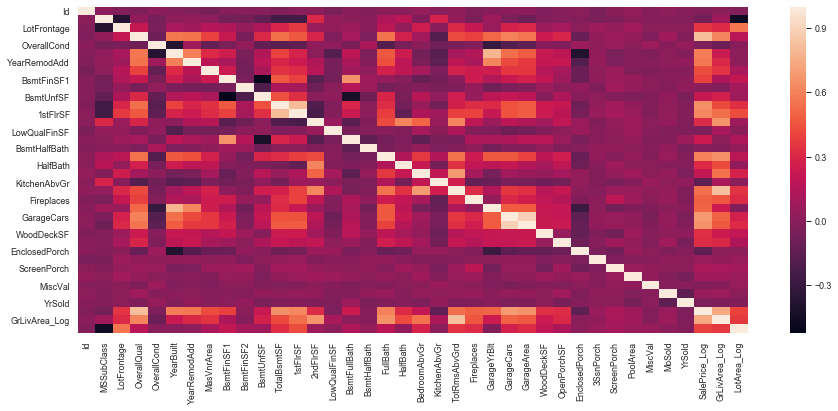

In [44]:
plt.figure(figsize=(15,6))
sns.heatmap(corr)

In [45]:
min_val_corr = 0.5

cols_above = list(ser_cor[ser_cor.values > min_val_corr].index)
print(cols_above)

['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt']


In [46]:
cols_below = list(ser_cor[ser_cor.values < min_val_corr].index)
print(cols_below)

['Fireplaces', 'MasVnrArea', 'LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


# Relation of categorical features to the target variable:SalePrice Log

In [47]:
print(list(categorical))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [48]:
for cat in list(categorical):
    print(df_train[cat].value_counts(), '\n', '*'*30)

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 
 ******************************
Pave    1452
Grvl       6
Name: Street, dtype: int64 
 ******************************
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64 
 ******************************
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64 
 ******************************
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64 
 ******************************
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64 
 ******************************
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 
 ******************************
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64 
 ******************************
NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74


In [49]:
print(len(categorical))

43


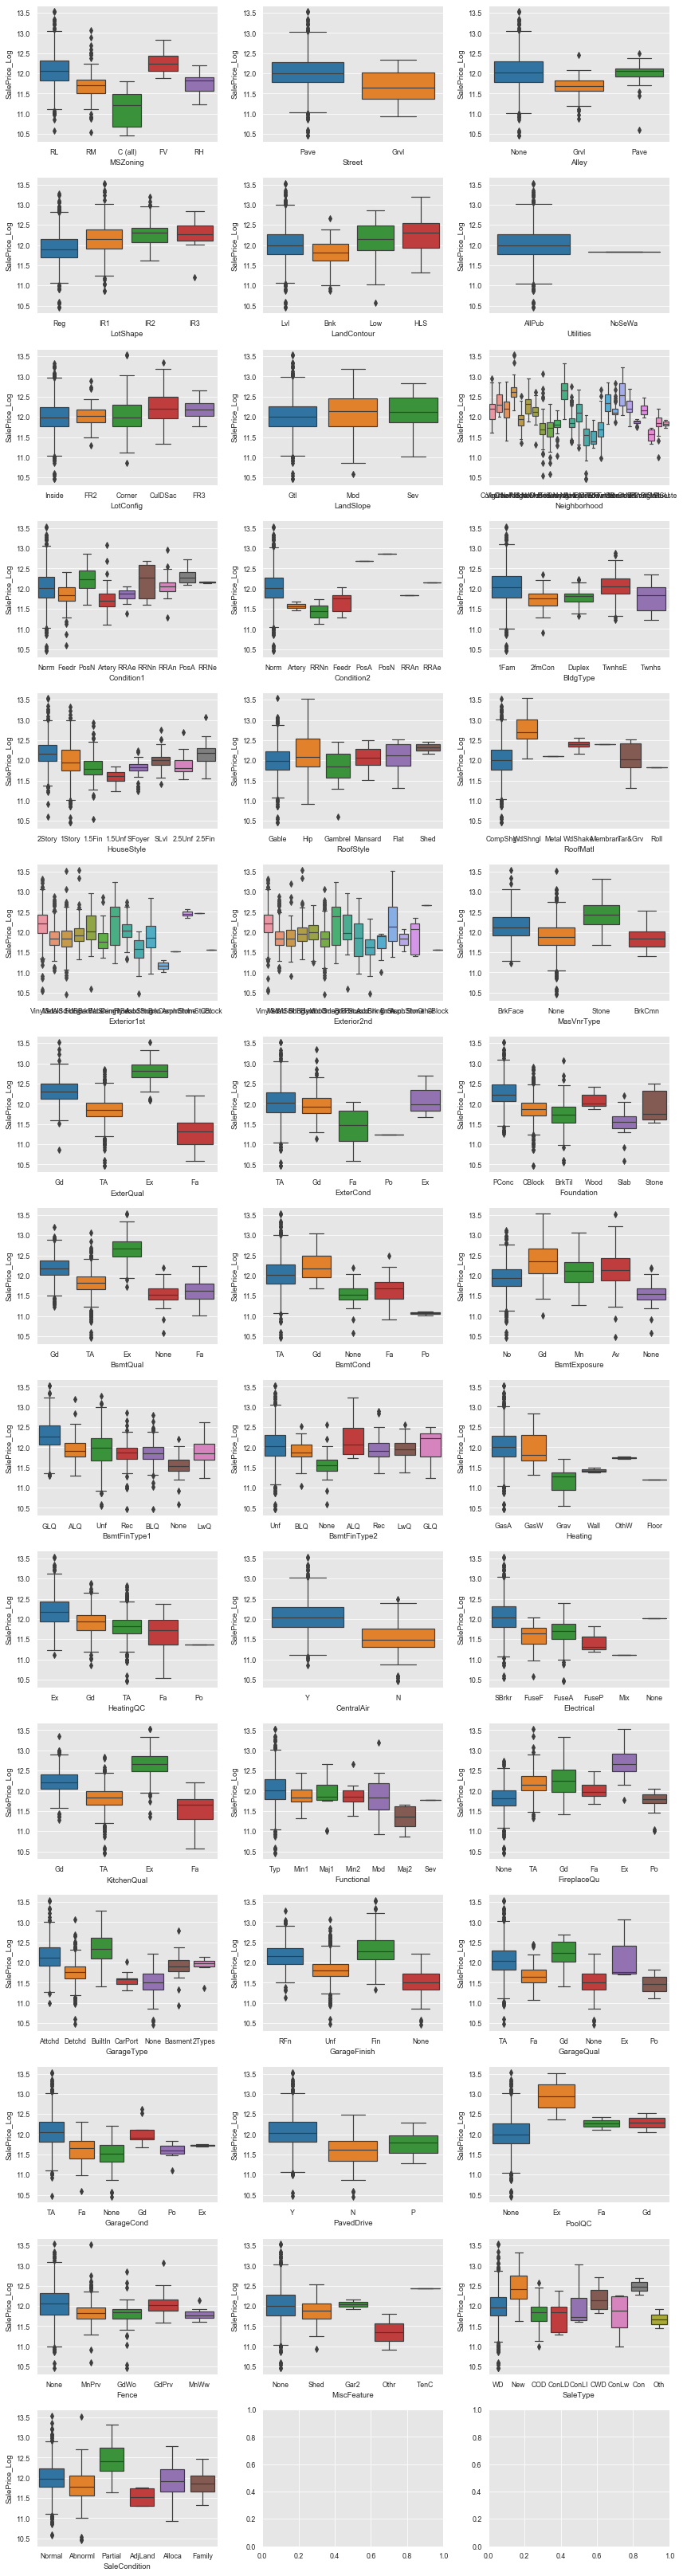

In [50]:
#relationship to the target feature:SalePrice_Log


cat_list = list(categorical)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize = (nr_cols*4, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols+c
        if i < len(cat_list):
            sns.boxplot(x = cat_list[i], y = target, data = df_train, ax = axs[r][c])
            
plt.tight_layout()
    

In [51]:
#categorical features with strong correlation to the Saleprice were chosen based on the
#observed variations in their box plots 
#box plots where significant different are seen btw the categorical values with respect to changes in saleprices
#are strongly correlated with Saleprice

catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

In [52]:
catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [53]:
#make objective of this function is to generate the correlation heat map 
#of each numeric feature (with > 0.5 correlation to the target feature:SalePrice_Log


def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)
    
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    

In [54]:
cols_above

['SalePrice_Log',
 'OverallQual',
 'GrLivArea_Log',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']

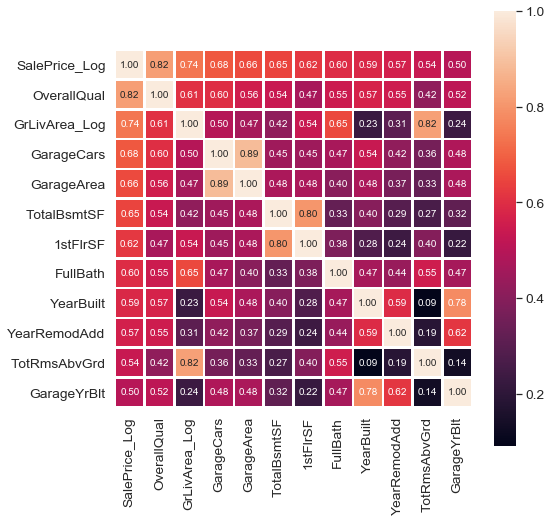

In [55]:
len_above = len(cols_above)

plot_corr_matrix(df_train, len_above, target)

## Task 4 Data Wrangling

**Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.**

In [56]:
id_test = df_test['Id']

to_drop_num  = cols_below
to_drop_catg = catg_weak_corr

cols_to_drop = to_drop_num + to_drop_catg 

for df in [df_train, df_test]:
    df.drop(cols_to_drop, inplace= True, axis = 1)

In [57]:
print(cols_below)

['Fireplaces', 'MasVnrArea', 'LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [58]:
df_test.shape

(1459, 21)

In [59]:
cat_strg = catg_strong_corr.copy()
cat_strg.remove('Neighborhood')

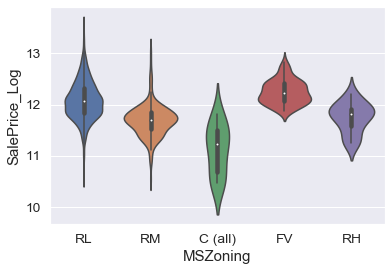

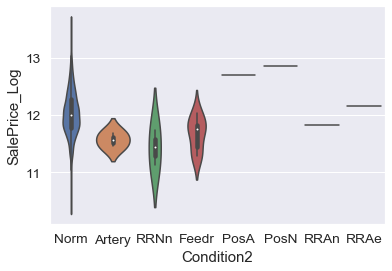

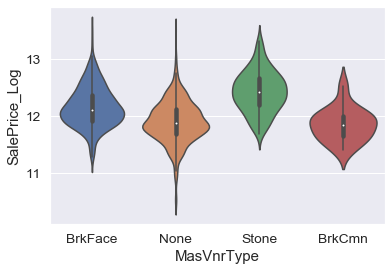

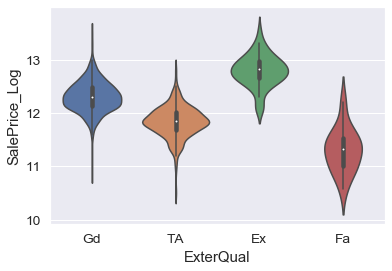

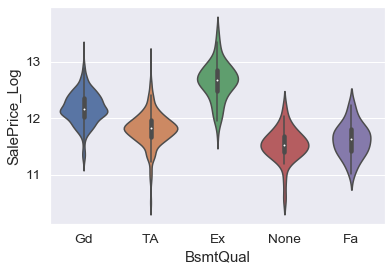

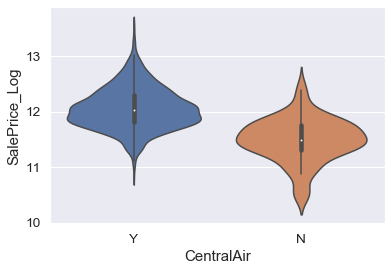

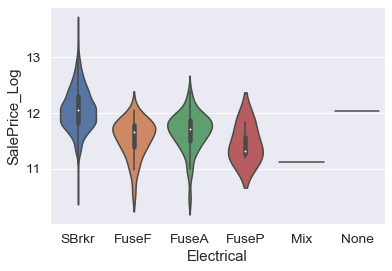

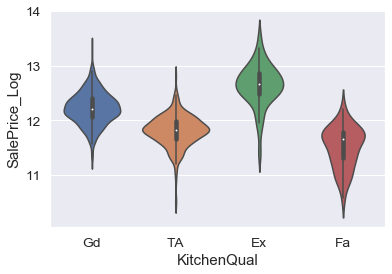

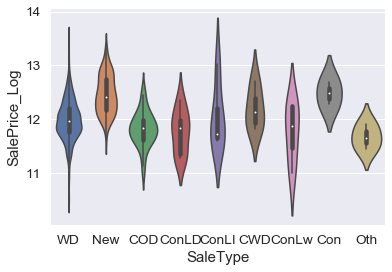

In [60]:
for cat in cat_strg:
    sns.violinplot(x=cat, y=target, data = df_train)
    plt.show()

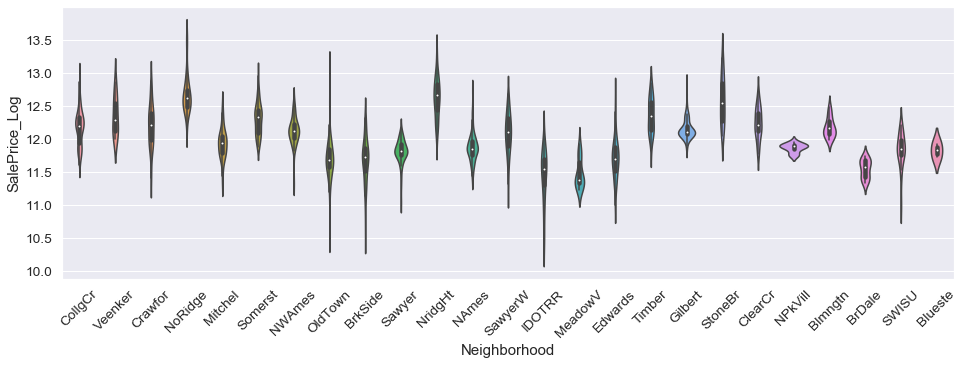

In [61]:
plt.figure(figsize = (16,5))

sns.violinplot(x= 'Neighborhood', y = target, data = df_train)
plt.xticks(rotation = 45)
plt.show()

In [62]:
print(cat_strg)

['MSZoning', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


In [63]:
#groupby the categorical features/columns and find the average/mean SalePrice for each of the unique value in each of the categorical columns
#example below

print(df_train.groupby('Neighborhood')[target].mean())

Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.679727
ClearCr    12.239900
CollgCr    12.163641
Crawfor    12.206659
Edwards    11.705322
Gilbert    12.155803
IDOTRR     11.446889
MeadowV    11.474522
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
NWAmes     12.130609
NoRidge    12.676000
NridgHt    12.619411
OldTown    11.703865
SWISU      11.838435
Sawyer     11.811468
SawyerW    12.090689
Somerst    12.296495
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Name: SalePrice_Log, dtype: float64


In [64]:
#lets groupby all the categorical features  to see the average saleprice for each of the unique values in each categorical feature


for cat in cat_strg:
    print(df_train.groupby(cat)[target].mean(), '\n', '\n', '*'*30)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePrice_Log, dtype: float64 
 
 ******************************
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64 
 
 ******************************
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: SalePrice_Log, dtype: float64 
 
 ******************************
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_Log, dtype: float64 
 
 ******************************
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_Log, dtype: float64 
 
 ******************************
CentralAir
N    11.491858
Y    12.061099
Name: SalePrice_Log, dtype: float64 
 
 ***********

In [65]:
#classified the unique values in each of the categorical features

## 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']


In [66]:
#notice that categiries with the highest numbers has the highest mean values
#you could use getdummies to convert categorical columns to numeric columns


for df in [df_train, df_test]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  
  

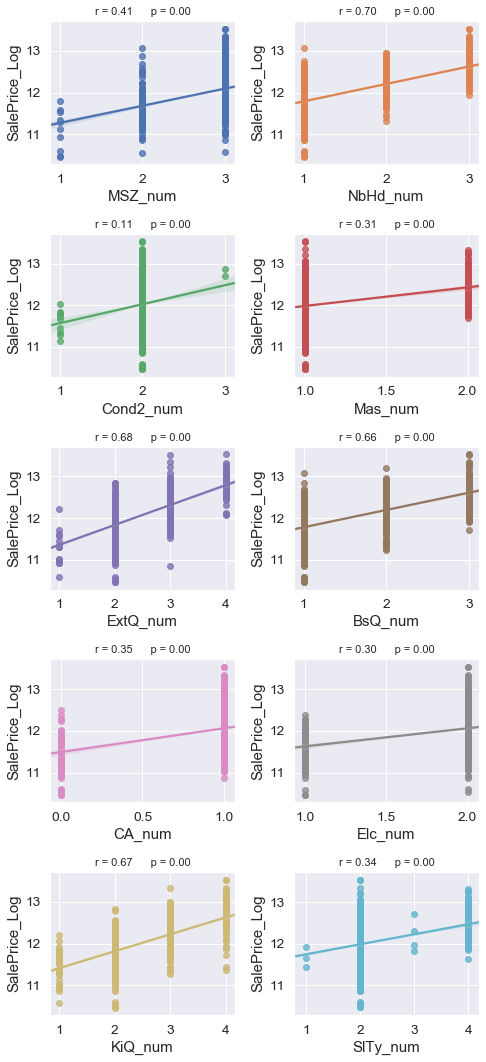

In [67]:
#correlation of the new numerical columns to the SalePriceLog

new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 5
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(df_train[new_col_num[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[new_col_num[i]], df_train[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [68]:

corr1 = df_train.corr()
corr_abs_1 = corr1.abs()

cols_all = len(df_train)
ser_corr_1 = corr_abs_1.nlargest(cols_all, target)[target]
print(ser_corr_1)

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
MSZ_num          0.409423
CA_num           0.351598
SlTy_num         0.337469
Mas_num          0.313280
Elc_num          0.304857
Cond2_num        0.107610
Name: SalePrice_Log, dtype: float64


In [69]:
len(df_train)

1458

In [70]:
#Here, we drop the categorical columns and the new numeric columns that are less than the threshold coefficient (0.5)

catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= min_val_corr].index)


for df in [df_train, df_test] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace= True, axis = 1)  

In [71]:
#here, the modified train df columns/features is shown in terms of the correlation to d target (SalePrice_Log)

corr2 = df_train.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df_train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Name: SalePrice_Log, dtype: float64


In [72]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)
    
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )

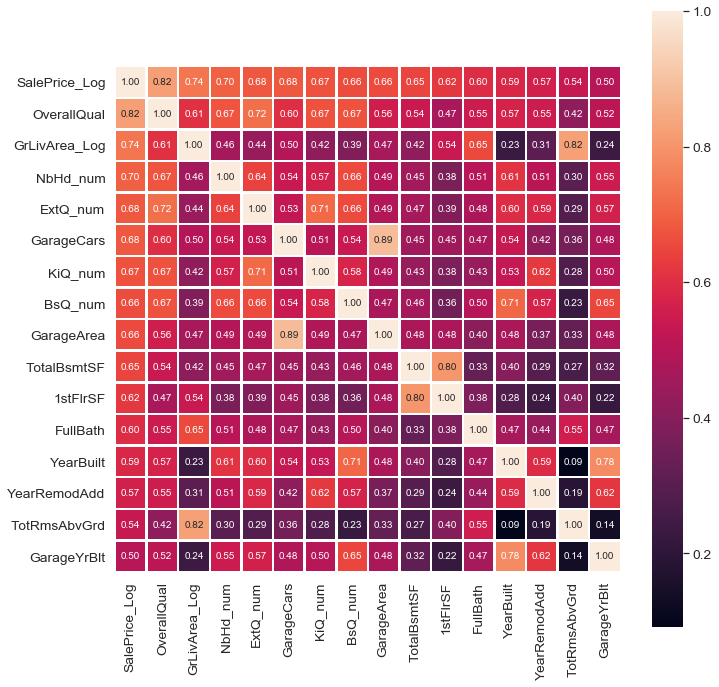

In [73]:
nr_feats=len(df_train.columns)
plot_corr_matrix(df_train, nr_feats, target)

**Check for Multicolinearity: check for features that have high coeff values (>0.8) to one another**

**For Example:** 'GrLivArea_Log' and 'TotRmsAbvGrd', 'GarageCars' and 'GarageArea', 'TotalBsmtSF' and '1stFlrSF', 'YearBuilt' and 'GarageYrBlt'

***We drop those features (that have multicolinearity) with low correlation to the SalePrice_Log***


In [74]:
cols = list(df_train.columns)
print(cols)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice_Log', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [75]:
#drop the columns with low correlation to SalePrice as discuss above
#drop also the Saleprice_Log

for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt', 'SalePrice_Log']:
    if col in cols:
        cols.remove(col)
print(cols)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [76]:
feats = cols.copy()

In [77]:
df_train_ml = df_train[feats].copy()
df_test_ml  = df_test[feats].copy()

y = df_train[target]

In [78]:
df_train_ml = df_train_ml.drop('MSZoning', axis = 1)
df_test_ml = df_test_ml.drop('MSZoning', axis = 1)

In [79]:
df_train_ml.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,GarageCars,GrLivArea_Log,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
1318,8,2001,2002,1753,2,3,7.488294,2,3,2,3
1009,5,1926,1950,1008,2,0,7.327781,1,2,1,2
50,6,1997,1997,794,2,2,7.293018,2,2,2,2
353,6,1928,2003,624,1,2,6.579251,1,2,1,2
442,5,1930,1992,1078,2,2,7.360740,1,2,1,2


In [80]:
df_test_ml.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,GarageCars,GrLivArea_Log,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
1071,7,2003,2003,979.0,2,2.0,7.566311,2,3,2,3
881,8,2005,2005,1538.0,2,2.0,7.338238,2,3,2,3
1359,4,1954,1954,967.0,1,2.0,7.207860,1,2,1,2
1172,9,2005,2005,1714.0,2,2.0,7.446585,3,3,3,3
288,5,1969,1969,1288.0,2,2.0,7.197435,2,2,2,2


## Task 5: Data Preprocessing

**sklearn.preprocessing.StandardScaler() function(): This function Standardize features by removing the mean and scaling to unit variance.**

The standard score of a sample x is calculated as: z = (x – u) / s

x = variable

u = mean

s = standard deviation

***The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.***

In [81]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_train_sc = sc.fit_transform(df_train_ml)
df_test_sc = sc.transform(df_test_ml)

In [82]:
coll = list(df_train_ml.columns)
coll_test = list(df_test_ml.columns)

In [83]:
df_train_sc = pd.DataFrame(data = df_train_sc)
df_test_sc = pd.DataFrame(data = df_test_sc)

In [84]:
df_train_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.658506,1.052959,0.880362,-0.473766,0.793546,0.313159,0.539624,0.658963,1.061109,0.648281,0.741127
1,-0.068293,0.158428,-0.428115,0.504925,0.793546,0.313159,-0.380198,0.658963,-0.689001,0.648281,-0.770150
2,0.658506,0.986698,0.831900,-0.319490,0.793546,0.313159,0.671287,0.658963,1.061109,0.648281,0.741127
3,0.658506,-1.862551,-0.718888,-0.714823,-1.025620,1.652119,0.551993,0.658963,-0.689001,-0.921808,0.741127
4,1.385305,0.953567,0.734975,0.222888,0.793546,1.652119,1.299759,2.162512,1.061109,0.648281,0.741127


In [85]:
df_test_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.795092,-0.338534,-1.155047,-0.411091,-1.025620,-1.025802,-1.417247,-0.844586,-0.689001,-0.921808,-0.770150
1,-0.068293,-0.437926,-1.300433,0.666433,-1.025620,-1.025802,-0.223575,-0.844586,-0.689001,-0.921808,0.741127
2,-0.795092,0.854175,0.638051,-0.300205,0.793546,0.313159,0.392695,0.658963,-0.689001,0.648281,-0.770150
3,-0.068293,0.887305,0.638051,-0.305026,0.793546,0.313159,0.345869,0.658963,-0.689001,-0.921808,0.741127
4,1.385305,0.688521,0.347279,0.548315,0.793546,0.313159,-0.337318,2.162512,1.061109,0.648281,0.741127


In [86]:
X = df_train_ml.copy()
y = df_train[target]
X_test = df_test_ml.copy()

In [87]:
X_sc = df_train_sc.copy()
X_test_sc = df_test_sc.copy()

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 11 columns):
OverallQual      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
TotalBsmtSF      1458 non-null int64
FullBath         1458 non-null int64
GarageCars       1458 non-null int64
GrLivArea_Log    1458 non-null float64
NbHd_num         1458 non-null int64
ExtQ_num         1458 non-null int64
BsQ_num          1458 non-null int64
KiQ_num          1458 non-null int64
dtypes: float64(1), int64(10)
memory usage: 136.7 KB


In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
OverallQual      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
TotalBsmtSF      1459 non-null float64
FullBath         1459 non-null int64
GarageCars       1459 non-null float64
GrLivArea_Log    1459 non-null float64
NbHd_num         1459 non-null int64
ExtQ_num         1459 non-null int64
BsQ_num          1459 non-null int64
KiQ_num          1459 non-null int64
dtypes: float64(3), int64(8)
memory usage: 125.5 KB


## Task 6: Grid Search - finding the best hyperparameters for the models to be used

## Sk learn Basic regression models and comparision of results

## The following Regressors from Sklearn will be tested:
**-LinearRegressions, -Ridge, -Lasso, -Elastic Net, -Stochastic Gradient Descent, -DecisionTreeRegressor, -RandomForestRegressor

In [104]:
#this function outputs best root mean square error value that is generated from the best parameters
#gotten through gridsearch

nr_cv = 5

def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score, '\n')    
    print(grid.best_params_, '\n')
    print(grid.best_estimator_)
    
    return best_score
    
   

**GridSearch is basically done to get the best hyperparameters for your desired model**, It is done by tuning hyperparameters (hyperparameter values) that are **specified** based on a **specific "scoring" parameter**, with respect to this, the hyperparameters that gives the **best "scoring values / metrics"** are the best_parameters for your model.

In [91]:
from sklearn.model_selection import GridSearchCV
scor = 'neg_mean_squared_error' #We will be tuning our hyperparameters based on the Mean Squared Error, 
#this will be used to evaluate prediction on the test data

**Note that, cross-validation is done within the gridsearch.**

In cross-validation, A model is trained using k - 1 (k is the nummber of folds) of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

In [92]:
#Linear Regression

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=nr_cv, verbose=1 , scoring = scor)
grid_linear.fit(X_sc, y)

sc_linear = get_best_score(grid_linear)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.1505726814777555 

{'copy_X': True, 'fit_intercept': True, 'normalize': True} 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


In [105]:
sc_linear = get_best_score(grid_linear)

0.1505726814777555 

{'copy_X': True, 'fit_intercept': True, 'normalize': True} 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [93]:
lin = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
lin.fit(X_sc, y)
pred_lin = lin.predict(X_test_sc)

In [94]:
df_testnew = pd.read_csv('test.csv')
df_testnew.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [95]:
linregg = pd.DataFrame()
linregg['Id'] = df_testnew['Id']
linregg['SalePrice'] = np.exp(pred_lin) #The irrational number e is also known as Euler’s number and is the base of the natural logarithm
linregg.head(5)

,Id,SalePrice
0,1461,106279.216911
1,1462,152709.104699
2,1463,170552.397740
3,1464,187332.219529
4,1465,217121.208526


**Ridge Regression**

Ridge and Lasso regression are some of the simple techniques to **reduce model complexity and prevent over-fitting** which may result from simple linear regression. 

**LASSO, Ridge, and Elastic-Net** are regularization techniques that are used for penalizing large coefficients in order to avoid overfitting, and the strength of the penalty should be tuned.

**Ridge Regression:** In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients. ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.


In [96]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1,10,100], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
#Note that 'Alpha - Regularization strength'
grid_ridge = GridSearchCV(ridge, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_ridge.fit(X_sc, y)

sc_ridge = get_best_score(grid_ridge)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.15055502490535033 

{'alpha': 10, 'normalize': False, 'tol': 1e-06} 

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=1e-06)


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.4s finished


In [106]:
sc_ridge = get_best_score(grid_ridge)

0.15055502490535033 

{'alpha': 10, 'normalize': False, 'tol': 1e-06} 

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=1e-06)


**Lasso Regression stands for Least Absolute Shrinkage and Selection Operator.**

Intuitively, this is similar to **(Ridge)** / L2 regularization, penalizing large weights/coefficients, and tending to make the network prefer small weights/coefficients. 

In L1 / **(Lasso)** regularization, the weights shrink by a constant amount toward 0. In L2 / **(Ridge)** regularization, the weights shrink by an amount which is proportional to w. And so when a particular weight has a large magnitude, |w|, L1 regularization shrinks the weight much less than L2 regularization does. By contrast, when |w| is small, L1 regularization shrinks the weight much more than L2 regularization.

The net result is that L1 / Lasso regularization tends to concentrate the weight of the network in a relatively small number of high-importance connections (perform feature selection), while the other weights are driven toward zero i.e. some of the features are completely neglected for the evaluation of output..

So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

In [144]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1,10,100], 'normalize':[True,False], 'max_iter': [10e5], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_lasso.fit(X_sc, y)

sc_lasso = get_best_score(grid_lasso)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.15057107715375181 

{'alpha': 0.001, 'max_iter': 1000000.0, 'normalize': False, 'tol': 0.0001} 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    1.6s finished


In [145]:
sc_lasso = get_best_score(grid_lasso)

0.15057107715375181 

{'alpha': 0.001, 'max_iter': 1000000.0, 'normalize': False, 'tol': 0.0001} 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


**ElasticNet Regression**

A third commonly used model of regression is the Elastic Net which incorporates penalties from both L1 and L2 regularization.

## l1_ratio : float
The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For **l1_ratio = 0** the penalty is an **L2 penalty.** For **l1_ratio = 1** it is an **L1 penalty**. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.



In [146]:
from sklearn.linear_model import ElasticNet

el = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_el = GridSearchCV(el, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_el.fit(X_sc, y)

sc_el = get_best_score(grid_el)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1517597862028106 

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01} 

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.01,
           max_iter=1000000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.01, warm_start=False)


[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    6.1s finished


In [147]:
sc_el = get_best_score(grid_el)

0.1517597862028106 

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01} 

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.01,
           max_iter=1000000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.01, warm_start=False)


**SGDRegressor**

**(check sklearn docs this was copied from there)** Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

In [99]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
parameters = {'max_iter' :[10000, 10e5], 'alpha':[1e-05, 1e-04, 1e-03, 1e-02, 1e-01], 'epsilon':[1e-02], 'fit_intercept' : [True, False], 'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] }
grid_sgd = GridSearchCV(sgd, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_sgd.fit(X_sc, y)

sc_sgd = get_best_score(grid_sgd)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 80 candidates, totalling 400 fits
0.15059924519483217 

{'alpha': 0.0001, 'epsilon': 0.01, 'fit_intercept': True, 'loss': 'squared_loss', 'max_iter': 1000000.0} 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.01,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss',
             max_iter=1000000.0, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished


In [109]:
sc_sgd = get_best_score(grid_sgd)

0.15059924519483217 

{'alpha': 0.0001, 'epsilon': 0.01, 'fit_intercept': True, 'loss': 'squared_loss', 'max_iter': 1000000.0} 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.01,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss',
             max_iter=1000000.0, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [100]:
from sklearn.tree import DecisionTreeRegressor

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [7, 8, 9, 10] , 'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30], 'presort': [False,True] , 'min_samples_leaf': [8, 10, 12, 14]}
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = scor)
grid_dtree.fit(X_sc, y)

sc_dtree = get_best_score(grid_dtree)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
0.17517031780998782 

{'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'presort': False} 

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=9,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


[Parallel(n_jobs=1)]: Done 9600 out of 9600 | elapsed:   47.2s finished


In [110]:
sc_dtree = get_best_score(grid_dtree)

0.17517031780998782 

{'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'presort': False} 

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=9,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


**Random Forest** is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging meta estimator, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.

Looking at it step-by-step, this is what a random forest model does:

1. Random subsets are created from the original dataset (bootstrapping).
2. At each node in the decision tree, only a random set of features are considered to decide the best split.
3. A decision tree model is fitted on each of the subsets.
4. The final prediction is calculated by averaging the predictions from all decision trees.

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
grid_rf = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=nr_cv, n_iter = 50, refit=True, verbose=1, scoring = scor)
grid_rf.fit(X_sc, y)

sc_rf = get_best_score(grid_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 13.7min finished


0.14592734170401833 

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True} 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [139]:
sc_rf = get_best_score(grid_rf)

0.14592734170401833 

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True} 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


**Comparison plot:RMSE of all the models**

# Task 7, 8, 9 : Correlation of the predicted from the various models and choosing the model with lowest RMSE

In [148]:
scores_list = [sc_linear, sc_ridge, sc_lasso, sc_el, sc_sgd, sc_dtree, sc_rf]

regressor_list = ['Linear', 'Ridge', 'Lasso', 'ElaNet', 'SGD', 'Dtree', 'RF']

Text(0.5, 0, 'Regressor Model Names')

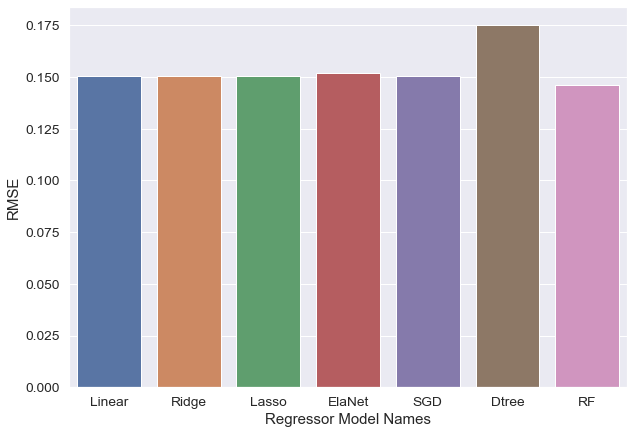

In [149]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=regressor_list, y=scores_list, ax=ax)
plt.ylabel('RMSE')
plt.xlabel('Regressor Model Names')


**RandomForest Regressor** has the lowest **RMSE** score in comparision to other regressor models; It is possible that through proper hyperparameter tuning other models including random forest could have a much lower RMSE, but for now we will take it as it is.

In [150]:
#lets compare the predictions generated by each of the regression models

predictions = {'linear' : grid_linear.predict(X_test_sc), 'Ridge' : grid_ridge.predict(X_test_sc), 'Lasso' : grid_lasso.predict(X_test_sc), 'Elastic Net' : grid_el.predict(X_test_sc), 'SGD' : grid_sgd.predict(X_test_sc), 'Decision Tree' : grid_dtree.predict(X_test_sc), 'RandomForest' : grid_rf.predict(X_test_sc)}

df_pred = pd.DataFrame(predictions)
df_pred.corr()

,linear,Ridge,Lasso,Elastic Net,SGD,Decision Tree,RandomForest
linear,1.000000,0.999991,0.999967,0.998770,0.999962,0.948000,0.980927
Ridge,0.999991,1.000000,0.999984,0.998965,0.999951,0.948066,0.981060
Lasso,0.999967,0.999984,1.000000,0.999070,0.999910,0.948089,0.981123
Elastic Net,0.998770,0.998965,0.999070,1.000000,0.998685,0.947694,0.981469
SGD,0.999962,0.999951,0.999910,0.998685,1.000000,0.948000,0.980933
Decision Tree,0.948000,0.948066,0.948089,0.947694,0.948000,1.000000,0.961130
RandomForest,0.980927,0.981060,0.981123,0.981469,0.980933,0.961130,1.000000


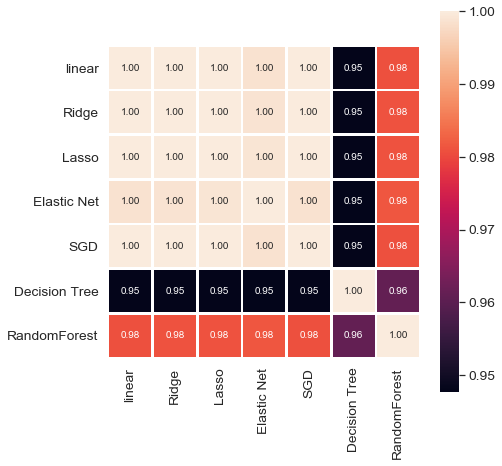

In [151]:
plt.figure(figsize=(7, 7))
sns.set(font_scale=1.25)
sns.heatmap(df_pred.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df_pred.columns , xticklabels=df_pred.columns
            )

Decision Tree and Random Forest show the least correlation to other models due to their RMSE scores been significantly different from all other regression models.

**Best Model - RandomForest Regressor is used to compute the saleprice**

In [152]:
pred_rf = grid_rf.predict(X_test_sc)
print(len(pred_rf))

1459


In [154]:

final_result = pd.DataFrame()
final_result['Id'] = df_testnew['Id']
final_result['SalePrice'] = np.exp(pred_rf)
final_result.head(10)


,Id,SalePrice
0,1461,119316.947569
1,1462,140897.292548
2,1463,172733.124772
3,1464,191493.710565
4,1465,199376.273657
5,1466,182709.505114
6,1467,169635.087867
7,1468,180611.121128
8,1469,181948.958799
9,1470,118822.148161


## Summary

1. Data Exploration was done to eaxmine the data and understand the underlying pattern of the data including the descriptive statistics of the individual features.

2. Correlation of the numeric features to the target variable was done to visulaize the strongly correlated numeric features to the target variable.

3. Data Wrangling was principally done for the categorical features to transform them into numeric form  that can effectively be used to train the model. Furthermore, after the data wrangling correlation of the categorical features was also donw to determine the features with strong correlation to the target variable.

4.  Model training and Prediction: GridSearchCV was performed on the regressor models to get the best hyperparameters for each of the models. Thereafter, prediction was done based on the model with the lowest RMSE.